In [111]:
%matplotlib inline
import pymc3 as pm
import seaborn as sns
import numpy as np
import pandas as pd

In [112]:
mydata = pd.read_csv("../data/diet_and_atp.tsv", sep="\t", header=0)

In [117]:
with pm.Model() as model:
    err = pm.Uniform("err", 0, 10)
    
    prot = pm.Uniform("prot", 0,1)
    carbo = pm.Uniform("carbo", 0,1)
    fat = pm.Uniform("fat", 0,1)
    
    prot_coeff = pm.Normal("prot_coeff", 1, 10) 
    carbo_coeff = pm.Normal("carbo_coeff", 1, 10) 
    fat_coeff = pm.Normal("fat_coeff", 1, 10) 
    
    p = pm.Normal("p", mu=prot_coeff*prot , sd=10, observed=mydata.Protein )
    c = pm.Normal("c", mu=carbo_coeff*carbo , sd=10, observed=mydata.Carbohydrates )
    f = pm.Normal("f", mu=fat_coeff*fat , sd=10, observed=mydata.Fat )
    
    mean = pm.Deterministic("mean", p + c + f)
    
    atp = pm.Normal("atp", mu=mean , sd=err, observed=mydata.ATP )
   
    trace = pm.sample(40000, step=pm.Metropolis())
    burned_trace = trace[20000:] 

100%|██████████| 40500/40500 [00:35<00:00, 1154.31it/s]


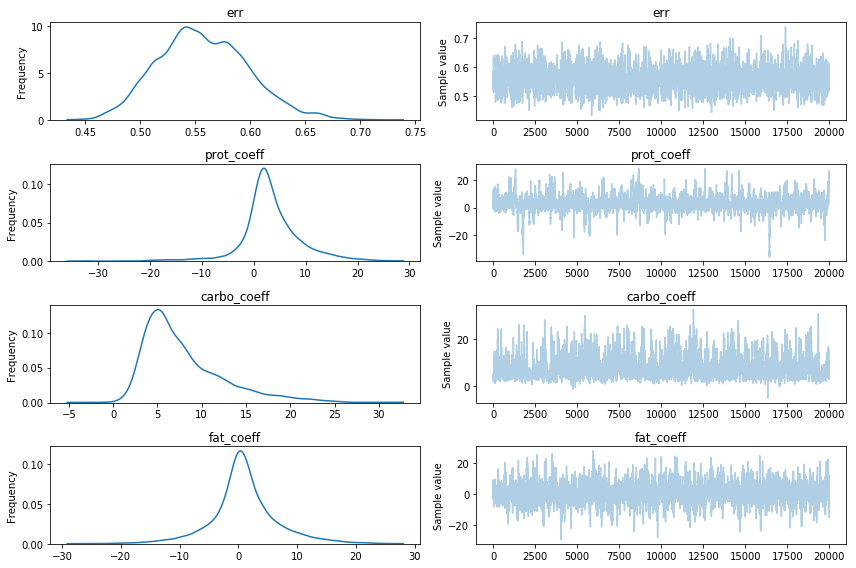

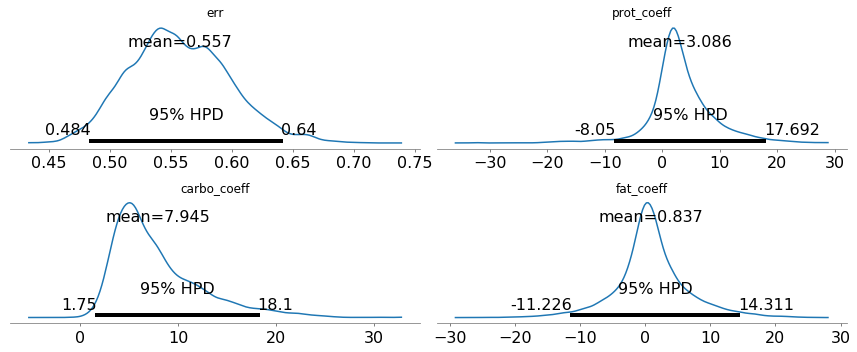

In [118]:
# PyMC3 have functions that allow us to follow for each parameter if it have converted.
# Given the following values, you think that our parameters have converged?

pm.plots.traceplot(trace=burned_trace, varnames=["err","prot_coeff", "carbo_coeff","fat_coeff"])
pm.plot_posterior(trace=burned_trace, varnames=["err","prot_coeff", "carbo_coeff","fat_coeff"], kde_plot=True);